In [ ]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [ ]:
#load data(sometimes need to use "/")
df = pd.read_csv('/content/AAPL-week2.csv')
df

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018/5/21,1,1,0,1
1,2018/5/28,1,1,1,0
2,2018/6/4,0,1,1,1
3,2018/6/11,0,0,1,1
4,2018/6/18,1,0,0,1
...,...,...,...,...,...
253,2023/3/27,0,1,1,1
254,2023/4/3,1,0,1,1
255,2023/4/10,0,1,0,1
256,2023/4/17,1,0,1,0


In [ ]:
# Train data
Forecast_train_data=df.iloc[0:207,:].copy()
Forecast_train_data

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018/5/21,1,1,0,1
1,2018/5/28,1,1,1,0
2,2018/6/4,0,1,1,1
3,2018/6/11,0,0,1,1
4,2018/6/18,1,0,0,1
...,...,...,...,...,...
202,2022/4/4,0,0,0,1
203,2022/4/11,0,0,0,0
204,2022/4/18,0,0,0,0
205,2022/4/25,0,0,0,0


In [ ]:
# Test data
Forecast_test_data=df.iloc[207:,:].copy()
Forecast_test_data 

,Date,Close,Lag_1,Lag_2,Lag_3
207,2022/5/9,0,0,0,0
208,2022/5/16,1,0,0,0
209,2022/5/23,0,1,0,0
210,2022/5/30,0,0,1,0
211,2022/6/6,0,0,0,1
212,2022/6/13,1,0,0,0
213,2022/6/20,0,1,0,0
214,2022/6/27,1,0,1,0
215,2022/7/4,1,1,0,1
216,2022/7/11,1,1,1,0


In [ ]:
# Expanding 1
Exp_training_1=Forecast_train_data.iloc[0:105,:].copy()
Exp_val_1=Forecast_train_data.iloc[105:105+34,:].copy()

# Expanding 2
Exp_training_2=Forecast_train_data.iloc[0:105+34,:].copy()
Exp_val_2=Forecast_train_data.iloc[105+34:105+34+34,:].copy()

# Expanding 3
Exp_training_3=Forecast_train_data.iloc[0:105+35+35,:].copy()
Exp_val_3=Forecast_train_data.iloc[105+35+35:105+35+35+35,:].copy()

In [ ]:
Exp_training_3 #175筆

,Date,Close,Lag_1,Lag_2,Lag_3
0,2018/5/21,1,1,0,1
1,2018/5/28,1,1,1,0
2,2018/6/4,0,1,1,1
3,2018/6/11,0,0,1,1
4,2018/6/18,1,0,0,1
...,...,...,...,...,...
170,2021/8/23,1,1,0,1
171,2021/8/30,0,1,1,0
172,2021/9/6,0,0,1,1
173,2021/9/13,1,0,0,1


In [ ]:
Exp_val_3 #32筆

,Date,Close,Lag_1,Lag_2,Lag_3
175,2021/9/27,1,0,1,0
176,2021/10/4,1,1,0,1
177,2021/10/11,1,1,1,0
178,2021/10/18,1,1,1,1
179,2021/10/25,1,1,1,1
180,2021/11/1,0,1,1,1
181,2021/11/8,1,0,1,1
182,2021/11/15,0,1,0,1
183,2021/11/22,1,0,1,0
184,2021/11/29,1,1,0,1


In [ ]:
#set x (make prediction)
# Train
x_train=Exp_training_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['Lag_1','Lag_2','Lag_3']

# Validation
x_val=Exp_val_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['Lag_1','Lag_2','Lag_3']

#set y (want to predict)
y_train=Exp_training_3['Close'].copy()
y_val=Exp_val_3['Close'].copy()

In [ ]:
x_train

,Lag_1,Lag_2,Lag_3
0,1,0,1
1,1,1,0
2,1,1,1
3,0,1,1
4,0,0,1
...,...,...,...
170,1,0,1
171,1,1,0
172,0,1,1
173,0,0,1


In [ ]:
y_train

0      1
1      1
2      0
3      0
4      1
      ..
170    1
171    0
172    0
173    1
174    0
Name: Close, Length: 175, dtype: int64

In [ ]:
# Tips: Using shape to call the amount of features in the data set 
input_features=x_train.shape[1]
print('Amount of features:',input_features)

Amount of features: 3


In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 2023
# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# 6.1 Create the model
clear.clear_session()
model=Sequential()

#model.add(Dense(units=6, input_dim=3, activation='relu'))
#model.add(Dense(units=12, activation='relu'))
#model.add(Dense(units=24, activation='relu'))
#model.add(Dense(units=48, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(units=96, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dense(1, activation='sigmoid'))


model.add(Dense(units=16, input_dim=3, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# learning_rate=0.001or0.005, beta_1=0.9or0.99,beta_2=0.999, epsilon=1e-8or1e-10
opt=Adam(learning_rate=0.005, beta_1=0.99,beta_2=0.999, epsilon=1e-10)
# binary_crossentropy
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 4)                 28        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 295
Trainable params: 295
Non-trainable pa

In [ ]:
# 7.1 Store in the history for more useful information
history=model.fit(x_train, y_train, epochs=100, batch_size=64,verbose=1,validation_data=(x_val, y_val))

Epoch 1/100
3/3 [==============================] - 1s 98ms/step - loss: 0.6928 - accuracy: 0.4971 - val_loss: 0.6964 - val_accuracy: 0.4688
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6883 - accuracy: 0.6114 - val_loss: 0.6965 - val_accuracy: 0.4688
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6822 - accuracy: 0.6114 - val_loss: 0.6980 - val_accuracy: 0.4688
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6783 - accuracy: 0.6114 - val_loss: 0.7006 - val_accuracy: 0.4688
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6748 - accuracy: 0.6114 - val_loss: 0.7045 - val_accuracy: 0.4688
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6719 - accuracy: 0.6114 - val_loss: 0.7095 - val_accuracy: 0.4688
Epoch 7/100
3/3 [==============================] - 0s 47ms/step - loss: 0.6681 - accuracy: 0.6114 - val_loss: 0.7157 - val_accuracy: 0.4688
Epoch 8/100
3/3 [===

In [ ]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

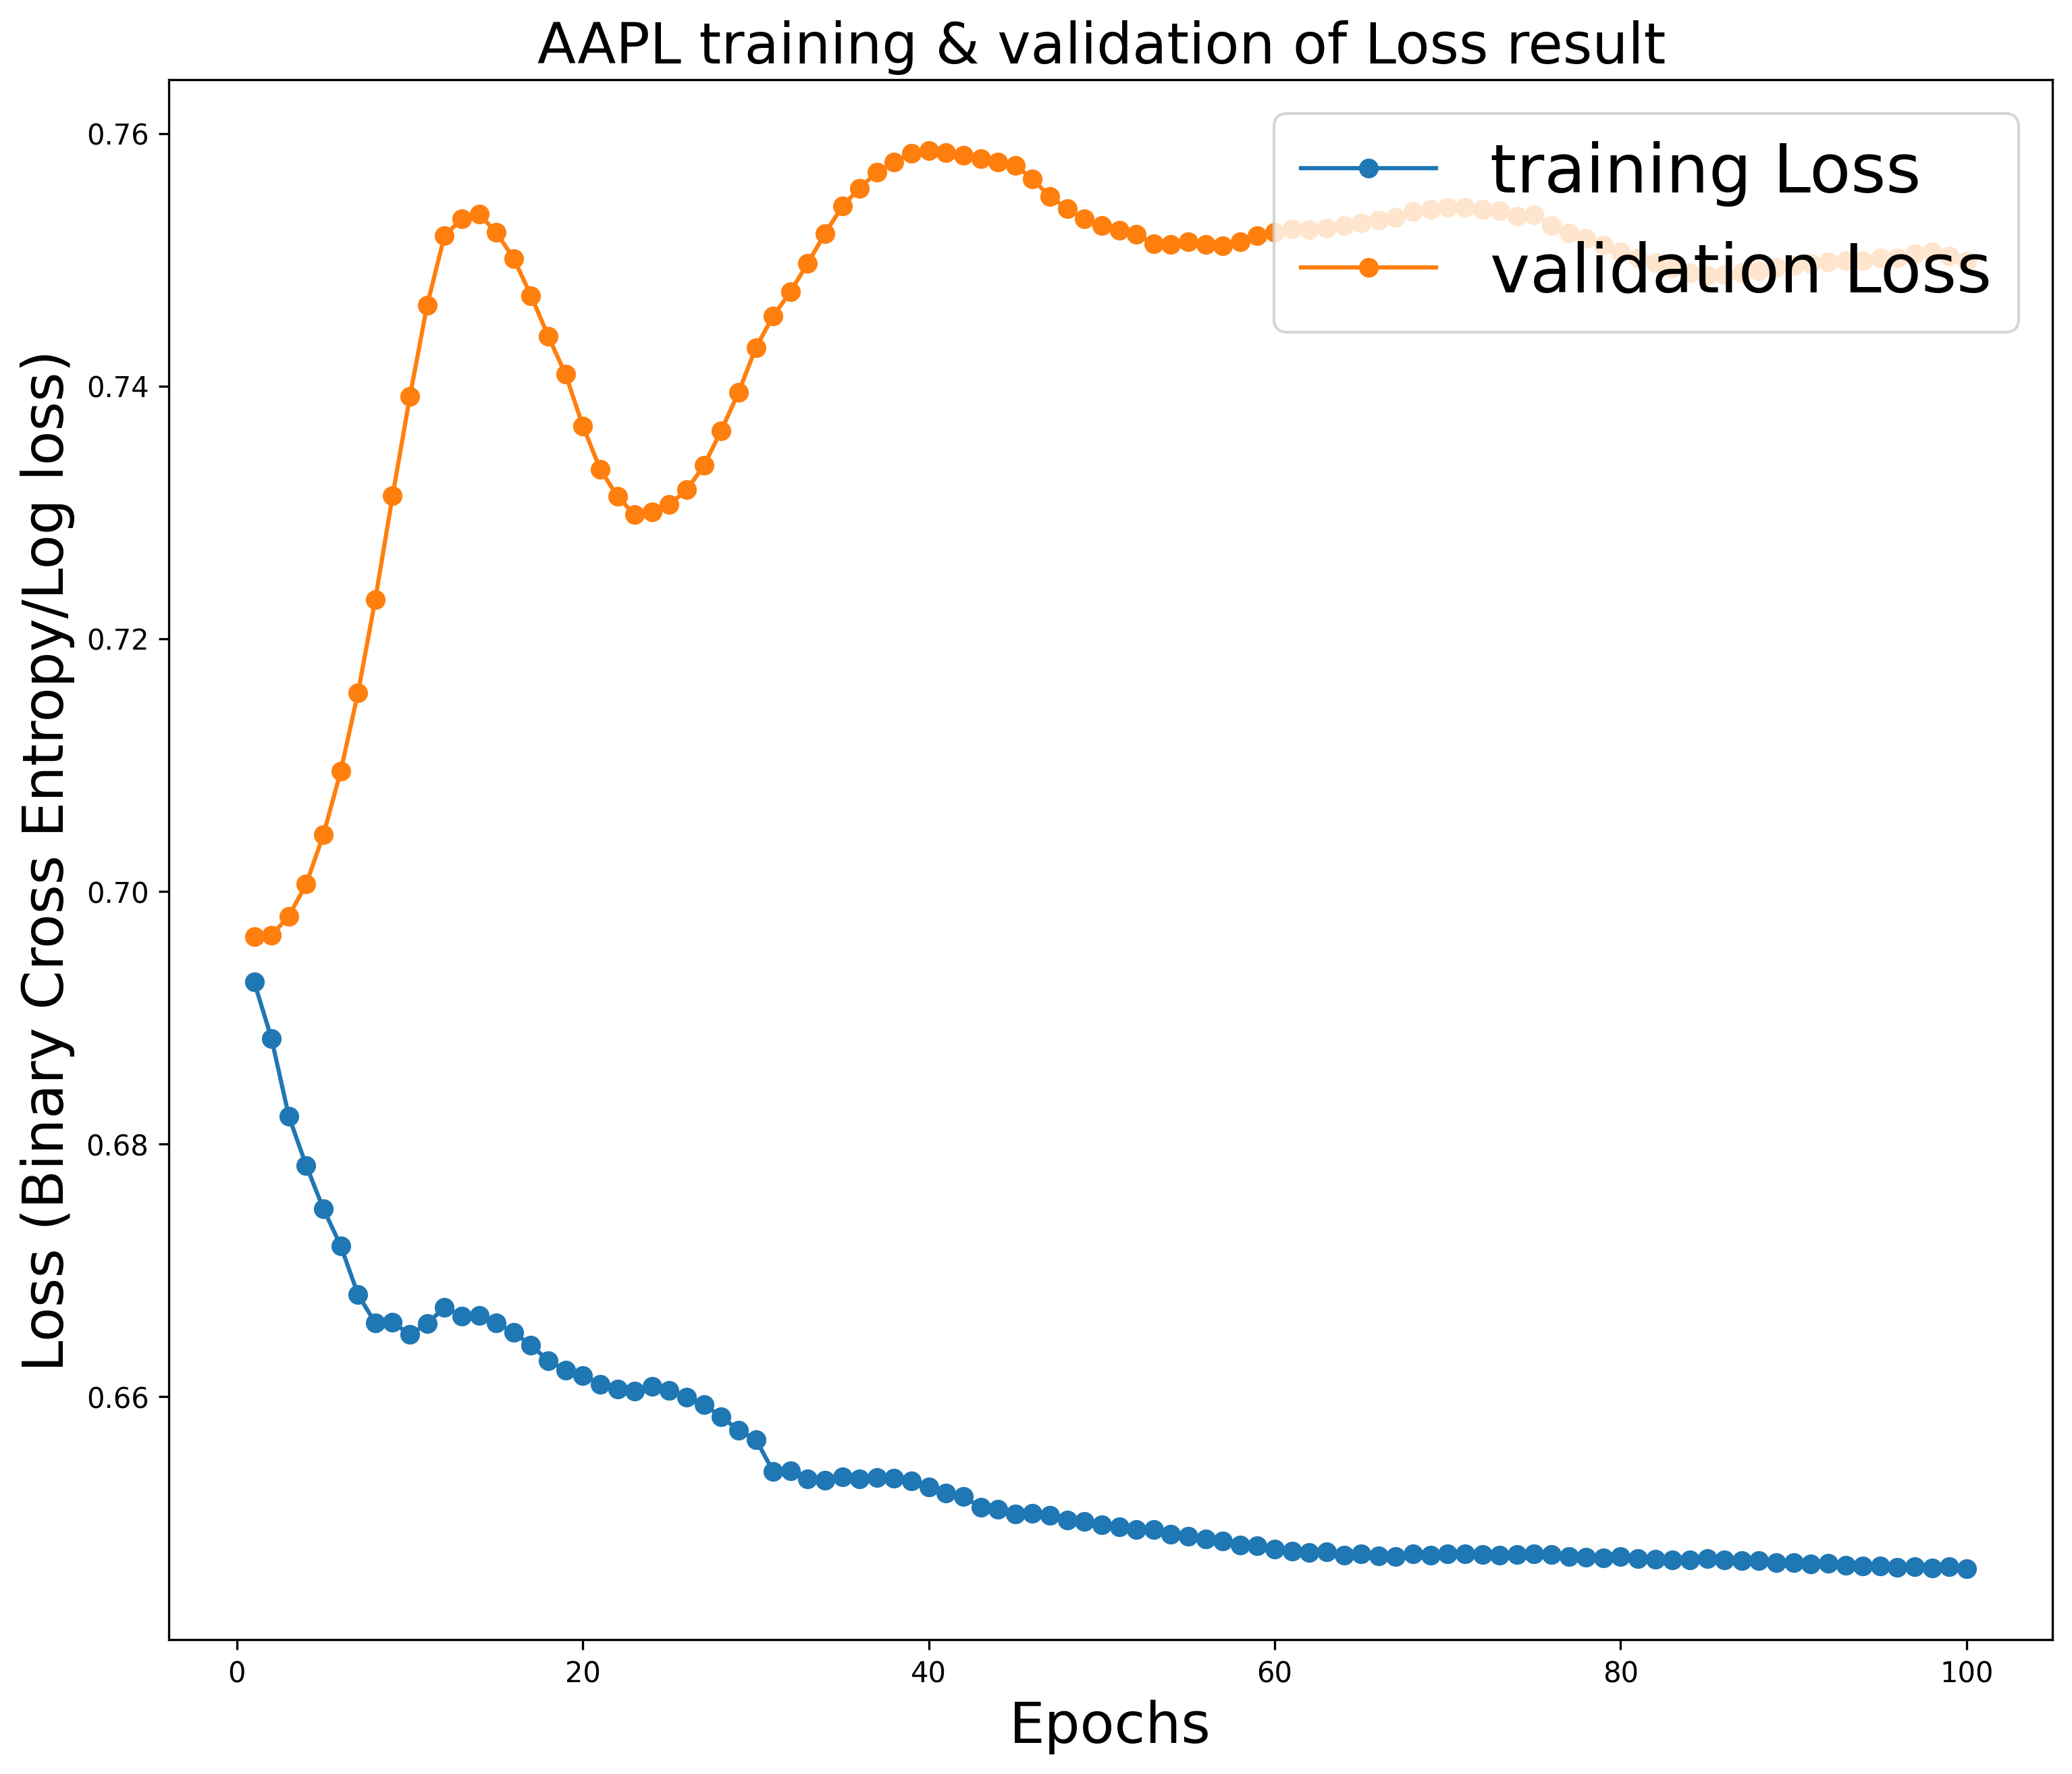

In [ ]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('AAPL training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

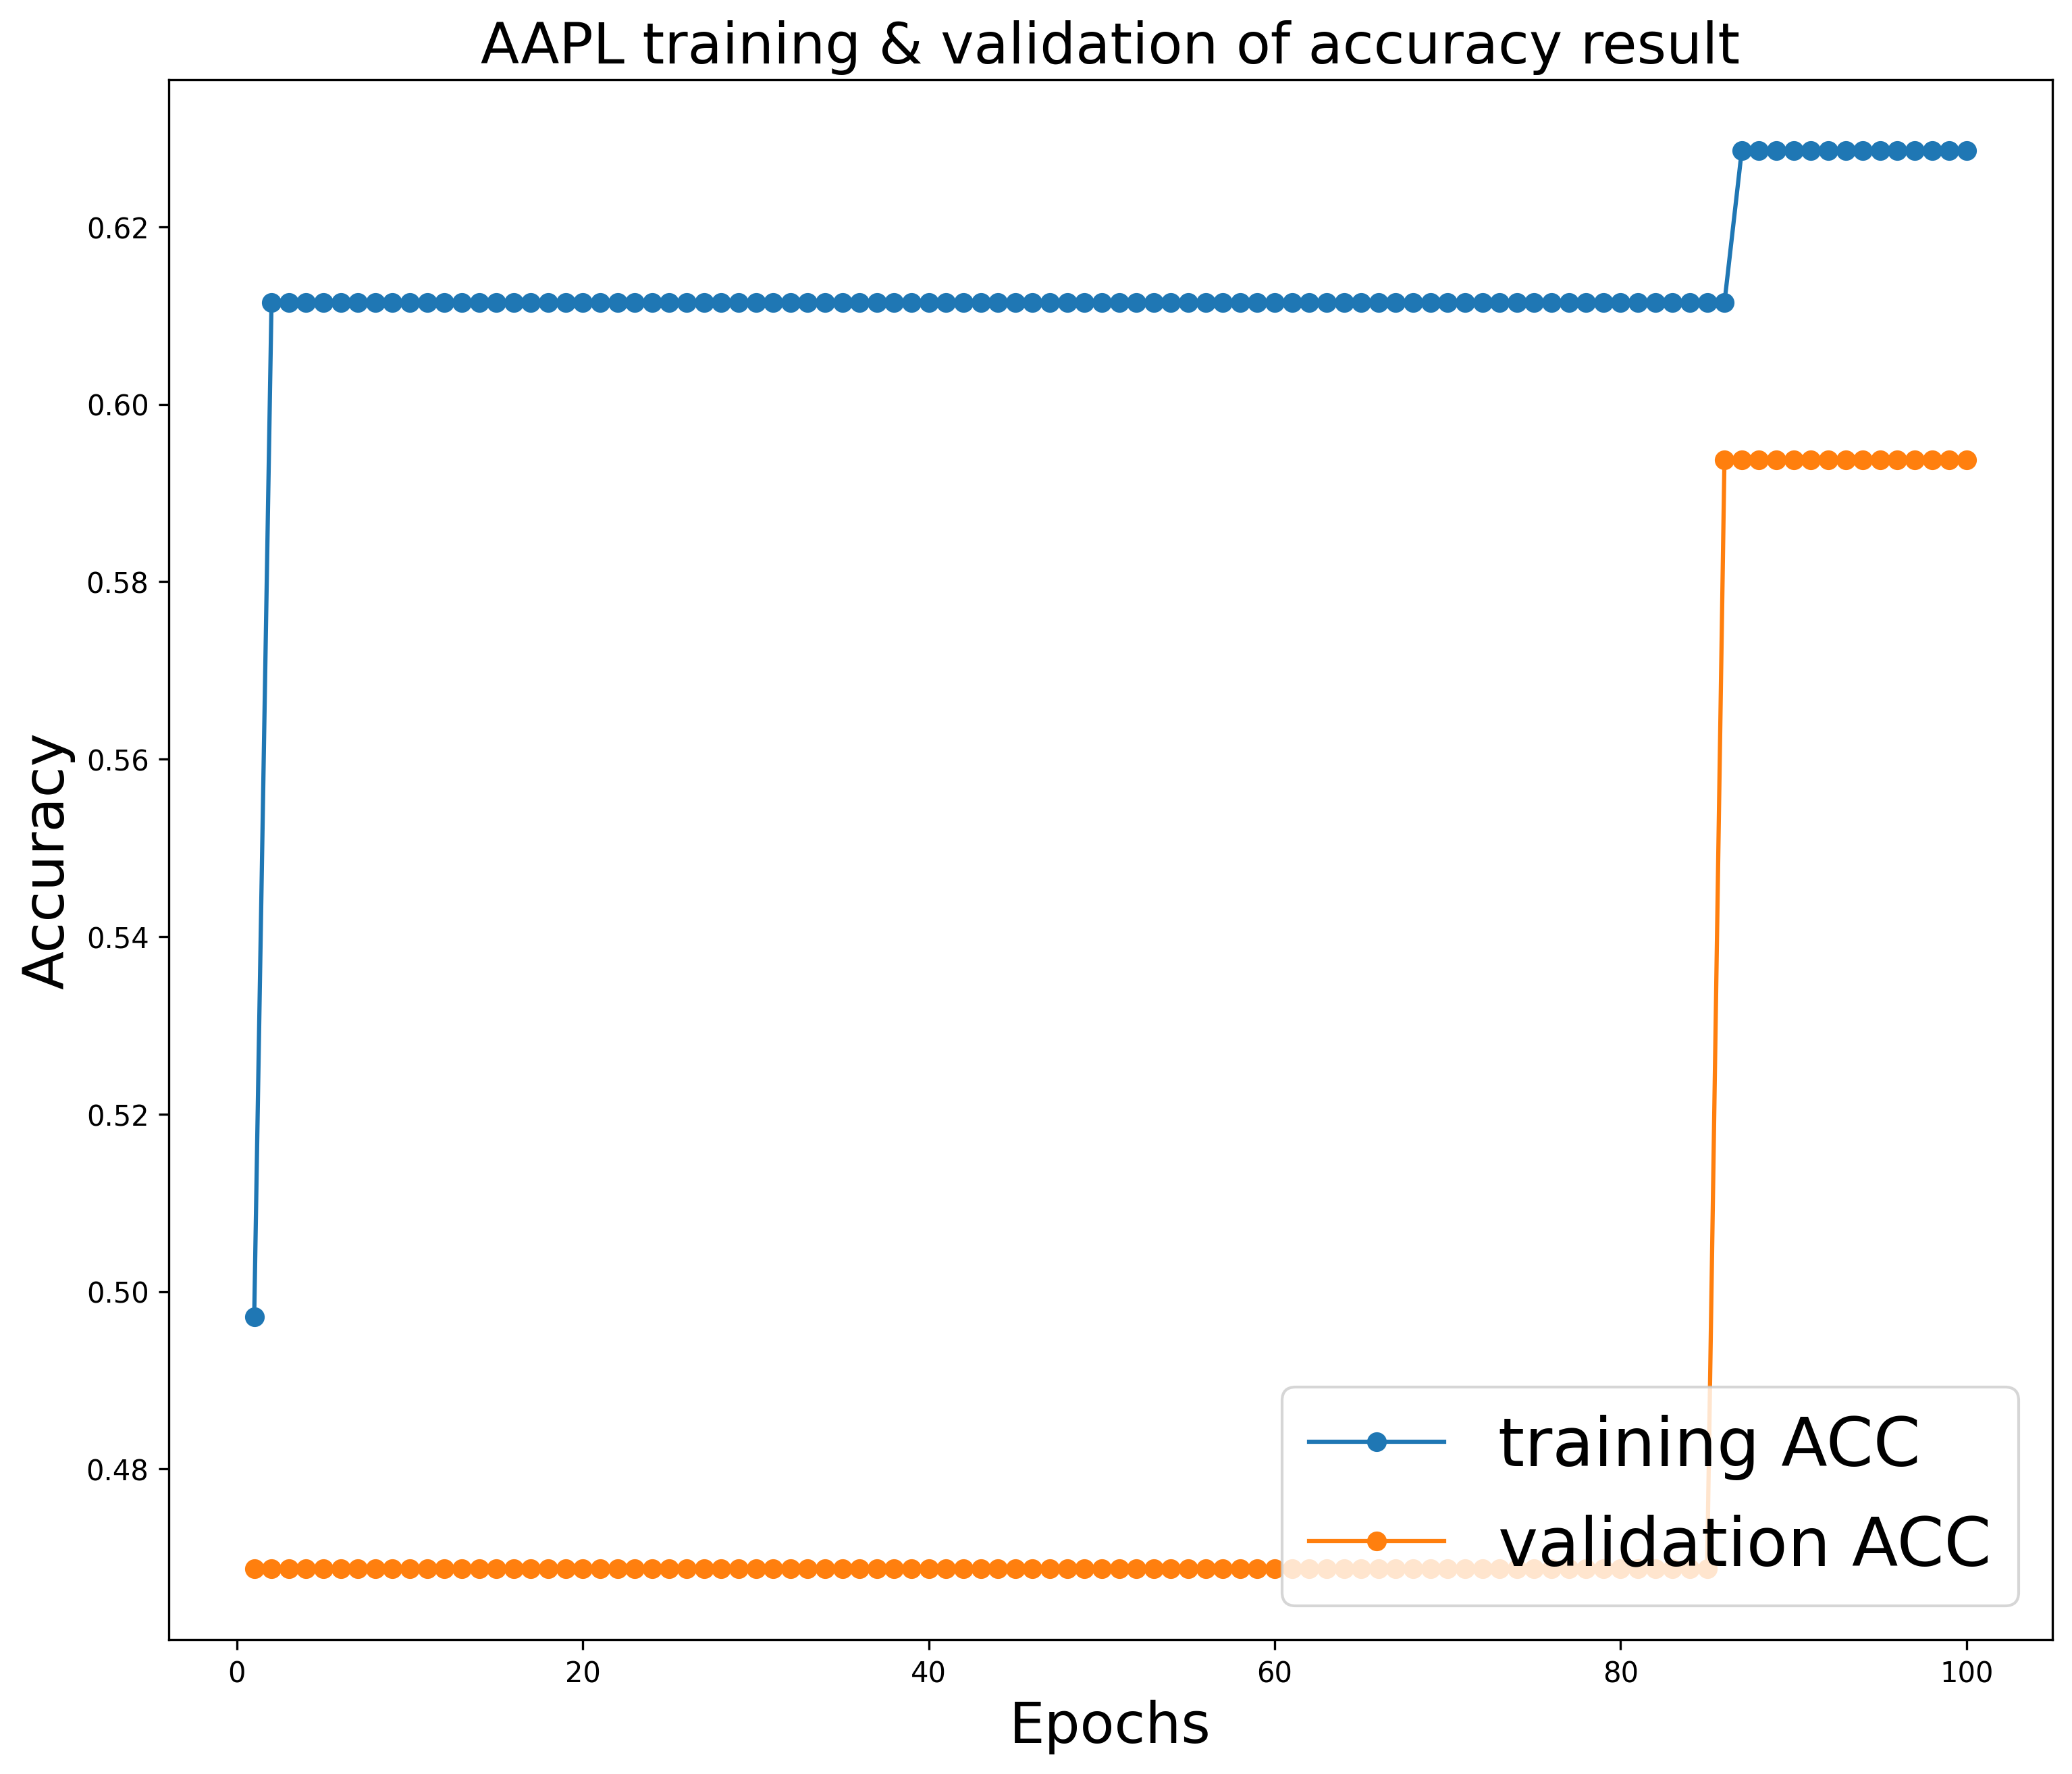

In [ ]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('AAPL training & validation of accuracy result',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [ ]:
# 7.3 Save the trained model
#model.save('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
model.save('AAPL-week2.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('AAPL-week2.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [ ]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Close'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Close'].copy()

In [ ]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_val :',Counter(y_val))
print('------------------------------------')
print('Y test :',Counter(Forecast_test_data['Close']))

y_train: Counter({1: 107, 0: 68})
------------------------------------
y_val : Counter({0: 17, 1: 15})
------------------------------------
Y test : Counter({0: 26, 1: 25})


In [ ]:
# 8.1 Make prediction 
prediction=np.round((ANN_model.predict_on_batch(x_forecast_test)),2)
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [ ]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Close'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
207,2022/5/9,0,0.49,0.49
208,2022/5/16,1,0.49,0.51
209,2022/5/23,0,0.49,0.49
210,2022/5/30,0,0.53,0.53
211,2022/6/6,0,0.61,0.61
212,2022/6/13,1,0.49,0.51
213,2022/6/20,0,0.49,0.49
214,2022/6/27,1,0.53,0.47
215,2022/7/4,1,0.59,0.41
216,2022/7/11,1,0.72,0.28


In [ ]:
# 8.1 Make prediction 
prediction=model.predict_on_batch(x_forecast_test)
prediction

array([[0.4943399 ],
       [0.4943399 ],
       [0.4943399 ],
       [0.5306963 ],
       [0.61068463],
       [0.4943399 ],
       [0.4943399 ],
       [0.5306963 ],
       [0.59455043],
       [0.7225937 ],
       [0.72605705],
       [0.72605705],
       [0.72605705],
       [0.72605705],
       [0.51809394],
       [0.61068463],
       [0.4943399 ],
       [0.4943399 ],
       [0.5306963 ],
       [0.61068463],
       [0.4943399 ],
       [0.4943399 ],
       [0.5306963 ],
       [0.59455043],
       [0.7225937 ],
       [0.51809394],
       [0.59455043],
       [0.7225937 ],
       [0.51809394],
       [0.61068463],
       [0.4943399 ],
       [0.4943399 ],
       [0.4943399 ],
       [0.4943399 ],
       [0.4943399 ],
       [0.4943399 ],
       [0.7225937 ],
       [0.72605705],
       [0.72605705],
       [0.51809394],
       [0.59455043],
       [0.5306963 ],
       [0.59455043],
       [0.5306963 ],
       [0.59455043],
       [0.7225937 ],
       [0.72605705],
       [0.518

In [ ]:
# 8.2 Transform the predictions to 0 and 1 
testing_prediction=(model.predict_on_batch(x_forecast_test) >= 0.5).astype('int')
testing_prediction

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_forecast_test,testing_prediction)
testing_f1s=f1_score(y_forecast_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_forecast_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_forecast_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_forecast_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_forecast_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 54.9
Testing f1s: 62.3
Testing pre: 52.78
Testing sen: 76.0
Testing spe: 34.62

Testing confusion matrix:
[[ 9 17]
 [ 6 19]]


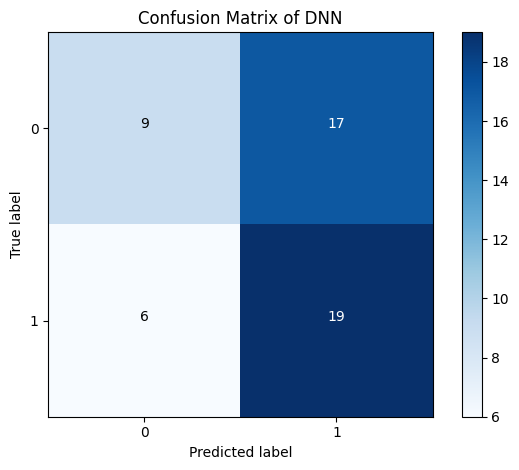

In [ ]:
cm = confusion_matrix(y_forecast_test,testing_prediction)

# 繪製混淆矩陣
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix of DNN")
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'])
plt.yticks(tick_marks, ['0', '1'])

# 在每個格子中顯示數字
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()